# 05: Results Exploration 
Date: 2022-08-04

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date
import numpy as np

## Comparison of RMSE model vs. Task loss model

In [10]:
hourly_results = pd.read_csv('../results/hourly_results.csv', usecols=[1, 2, 3, 4, 5, 6, 7])

In [11]:
hourly_results.head()

,Hour,RMSEnn_rmse,RMSEnn_acc,RMSEnn_taskloss,Taskloss_rmse,Taskloss_acc,Taskloss_taskloss
0,0,0.297216,0.952832,3.830121,0.378681,1.085335,0.087733
1,1,0.290344,0.953605,3.567340,0.369513,1.085336,0.090333
2,2,0.288381,0.953206,3.479153,0.352401,1.079597,0.089001
3,3,0.292219,0.950619,3.596048,0.343157,1.076304,0.087524
4,4,0.286799,0.952569,3.431056,0.337068,1.073956,0.086875


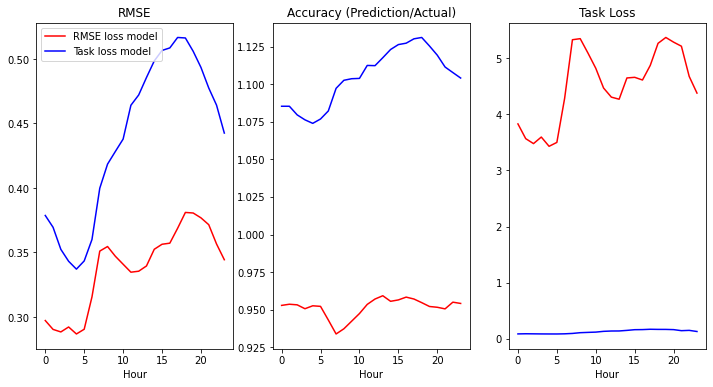

In [27]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(131)
ax1.plot(hourly_results.RMSEnn_rmse, color = 'r', label = 'RMSE loss model')
ax1.plot(hourly_results.Taskloss_rmse, color = 'b', label = 'Task loss model')
ax1.title.set_text('RMSE')
plt.xlabel('Hour')
ax2 = fig.add_subplot(132)
ax2.plot(hourly_results.RMSEnn_acc, color = 'r')
ax2.plot(hourly_results.Taskloss_acc, color = 'b')
ax2.title.set_text('Accuracy (Prediction/Actual)')
plt.xlabel('Hour')
ax3 = fig.add_subplot(133)
ax3.plot(hourly_results.RMSEnn_taskloss, color = 'r', label = 'RMSE loss model')
ax3.plot(hourly_results.Taskloss_taskloss, color = 'b', label = 'Task loss model')
ax3.title.set_text('Task Loss')
ax1.legend(loc = 'upper left')
plt.xlabel('Hour')
plt.savefig('../figures/hourly_metrics_combined.png', facecolor = 'white', edgecolor = 'none')
plt.show()

### Typical Day Plot

In [94]:
rmse_predictions = pd.read_csv('../results/RMSE_predictions.csv', usecols = range(26)[1:26])
task_predictions = pd.read_csv('../results/taskloss_predictions.csv', usecols = range(26)[1:26])
actual_load  = pd.read_csv('../data/processed_data/load_day.csv')

# convert dates
rmse_predictions['date'] = pd.to_datetime(rmse_predictions['date'], format = "%Y-%m-%d %H:%M:%S%z", utc = True)
rmse_predictions['date'] = rmse_predictions['date'].dt.date
task_predictions['date'] = pd.to_datetime(task_predictions['date'], format = "%Y-%m-%d %H:%M:%S%z", utc = True)
task_predictions['date'] = task_predictions['date'].dt.date
actual_load['date'] = pd.to_datetime(actual_load['date'], format = "%Y-%m-%d %H:%M:%S%z", utc = True)
actual_load = actual_load[actual_load['date'].dt.year == 2011].reset_index(drop = True)
actual_load['date'] = actual_load['date'].dt.date


In [96]:
filtered = actual_load[actual_load['date'] == date(2011, 1, 1)]
load_only = filtered.drop(['date'], axis = 1).values.tolist()[0]

In [105]:
def plot_trends(pred1, pred2, actual_load, day, labels): 
    
    def filter_days(df, day):
        filtered = df[df['date'] == day]
        load_only = filtered.drop(['date'], axis = 1).values.tolist()[0]
        return load_only
    
    pred1 = filter_days(pred1, day)
    pred2 = filter_days(pred2, day)
    actual_load = filter_days(actual_load, day)
    
    fig = plt.figure(figsize = (12, 6))
    plt.plot(pred1, 'r', label = labels[0])
    plt.plot(pred2, 'b', label = labels[1])
    plt.plot(actual_load, label = 'Actual load')
    plt.legend()
    plt.show()

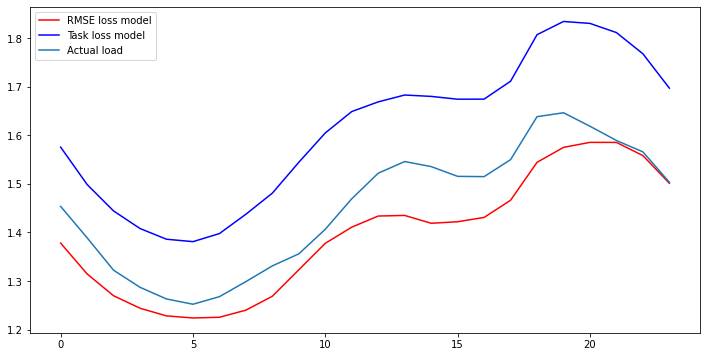

In [106]:
plot_trends(rmse_predictions, task_predictions, actual_load,date(2011, 1, 1), labels = ['RMSE loss model', 'Task loss model'])

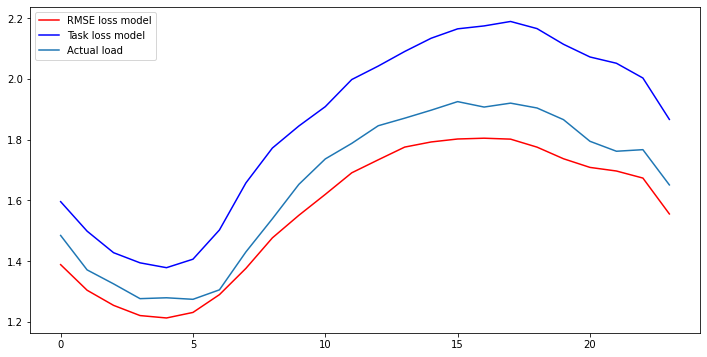

In [107]:
plot_trends(rmse_predictions, task_predictions, actual_load,date(2011, 6, 15), labels = ['RMSE loss model', 'Task loss model'])

## Experiment with different weight models

### Typical day plots

In [136]:
task0_predictions = pd.read_csv('../results/taskloss_predictions_exp_0.csv', usecols = range(26)[1:26])
task1_predictions = pd.read_csv('../results/taskloss_predictions_exp_1.csv', usecols = range(26)[1:26])
task2_predictions = pd.read_csv('../results/taskloss_predictions_exp_2.csv', usecols = range(26)[1:26])

# convert dates
task0_predictions['date'] = pd.to_datetime(task0_predictions['date'], format = "%Y-%m-%d %H:%M:%S%z", utc = True)
task0_predictions['date'] = task0_predictions['date'].dt.date
task1_predictions['date'] = pd.to_datetime(task1_predictions['date'], format = "%Y-%m-%d %H:%M:%S%z", utc = True)
task1_predictions['date'] = task1_predictions['date'].dt.date
task2_predictions['date'] = pd.to_datetime(task2_predictions['date'], format = "%Y-%m-%d %H:%M:%S%z", utc = True)
task2_predictions['date'] = task2_predictions['date'].dt.date


### Equal weight vs. RMSE Model

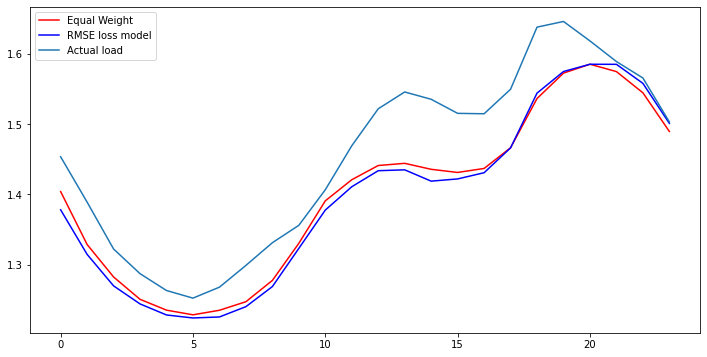

In [111]:
plot_trends(task0_predictions, rmse_predictions, actual_load, date(2011, 1, 1), labels = ['Equal Weight', 'RMSE loss model'])

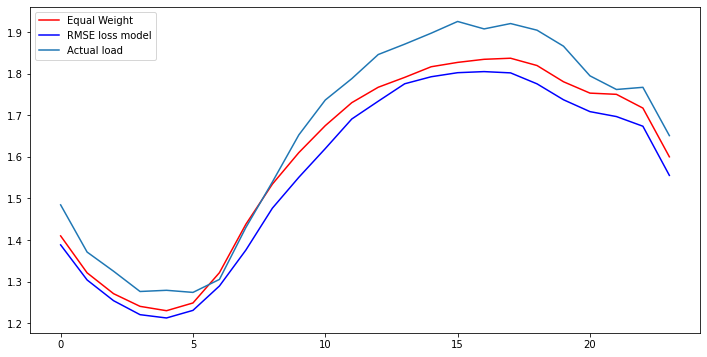

In [112]:
plot_trends(task0_predictions, rmse_predictions, actual_load, date(2011, 6, 15), labels = ['Equal Weight', 'RMSE loss model'])

### Equal average weights and with variable over generation cost (to simulate grid cleaniliness)

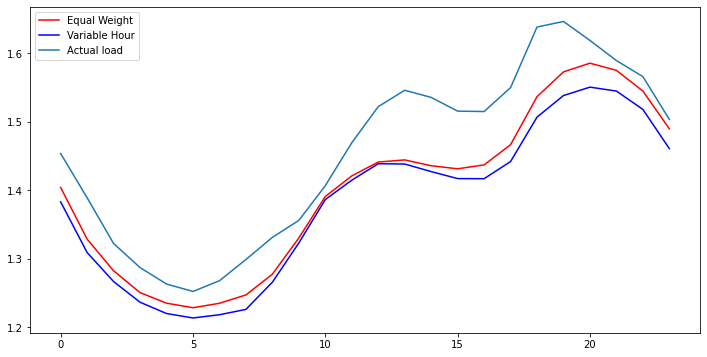

In [108]:
plot_trends(task0_predictions, task1_predictions, actual_load, date(2011, 1, 1), labels = ['Equal Weight', 'Variable Hour'])

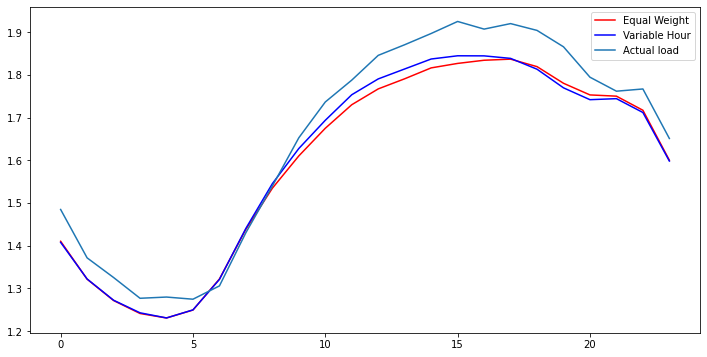

In [109]:
plot_trends(task0_predictions, task1_predictions, actual_load, date(2011, 6, 15), labels = ['Equal Weight', 'Variable Hour'])

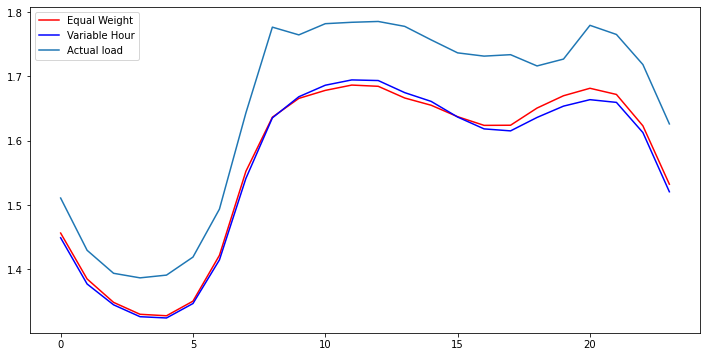

In [110]:
plot_trends(task0_predictions, task1_predictions, actual_load, date(2011, 3, 15), labels = ['Equal Weight', 'Variable Hour'])

### Equal average weights and with variable over generation cost (to simulate grid cleaniliness) - min/max scaled 

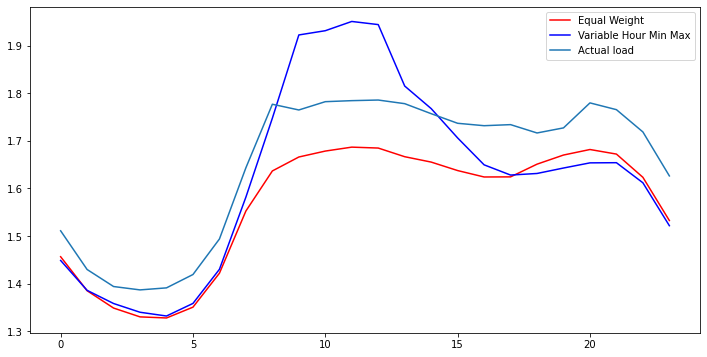

In [137]:
plot_trends(task0_predictions, task2_predictions, actual_load, date(2011, 3, 15), labels = ['Equal Weight', 'Variable Hour Min Max'])

## Plot average trends

In [132]:
def plot_avg_trends(pred1, pred2, actual_load, labels, title = "", save = False): 
    
    def return_average(df): 
        df_new = df.drop('date', axis = 1)
        return df_new.mean().values.tolist()
    
    pred1 = return_average(pred1)
    pred2 = return_average(pred2)
    actual_load = return_average(actual_load)
    
    fig = plt.figure(figsize = (12, 6))
    plt.plot(pred1, 'r', label = labels[0])
    plt.plot(pred2, 'b', label = labels[1])
    plt.plot(actual_load, label = 'Actual load')
    plt.xlabel('Hour')
    plt.legend()
    plt.title(title)
    
    if save: 
         plt.savefig(save, facecolor = 'white', edgecolor = 'none')
    plt.show()

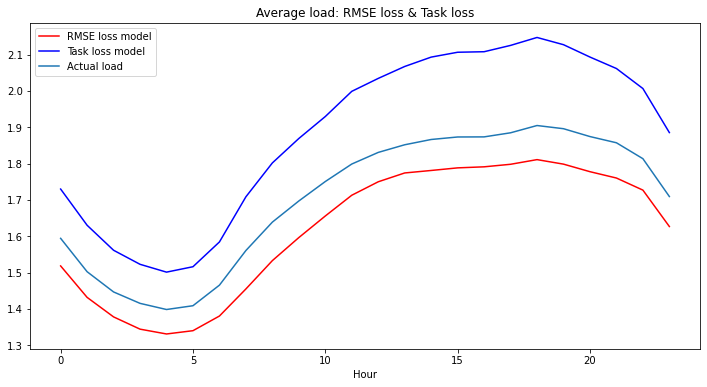

In [135]:
plot_avg_trends(rmse_predictions, task_predictions, actual_load, labels = ['RMSE loss model', 'Task loss model'], title = 'Average load: RMSE loss & Task loss', save = '../figures/avg_load_rmse_task_comparison.png')

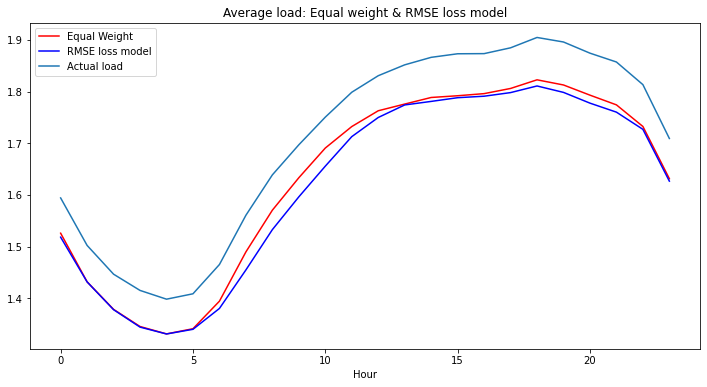

In [134]:
plot_avg_trends(task0_predictions, rmse_predictions, actual_load, labels = ['Equal Weight', 'RMSE loss model'], title = 'Average load: Equal weight & RMSE loss model', save = '../figures/equal_weight_comparison.png')

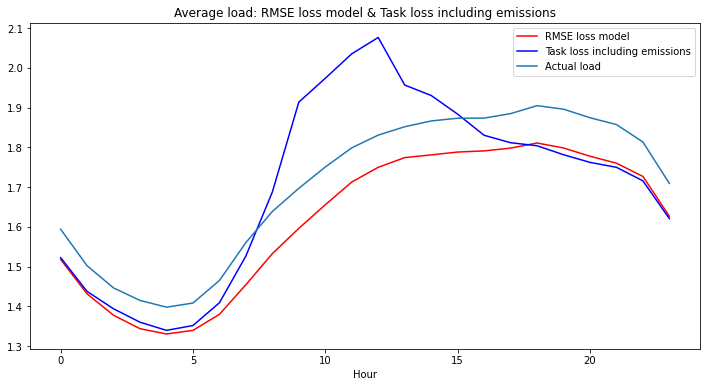

In [146]:
plot_avg_trends(rmse_predictions, task2_predictions, actual_load, labels = ['RMSE loss model', 'Task loss including emissions'], 
                title = 'Average load: RMSE loss model & Task loss including emissions', save = '../figures/emissions_average_load.png')

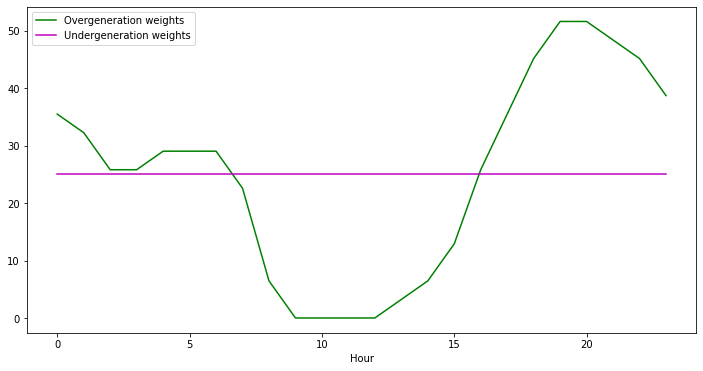

In [145]:
emissions_schedule = np.array([0.43, 0.42, 0.40, 0.40, 0.41, 0.41, 0.41, 0.39, 0.34, 0.32, 0.32, 0.32,
                        0.32, 0.33, 0.34, 0.36, 0.40, 0.43, 0.46, 0.48, 0.48, 0.47, 0.46, 0.44])

# min max scale
emissions_schedule = (emissions_schedule - np.min(emissions_schedule))/(np.max(emissions_schedule) - np.min(emissions_schedule))

gamma_over = 25.0/np.mean(emissions_schedule) * emissions_schedule

gamma_under = np.array([25.0]*24)

fig = plt.figure(figsize = (12, 6))
plt.plot(gamma_over, 'g', label = 'Overgeneration weights')
plt.plot(gamma_under, 'm', label = 'Undergeneration weights')
plt.legend()
plt.xlabel('Hour')
plt.savefig('../figures/opt_emissions_weights.png', facecolor = 'white', edgecolor = 'none')
plt.show()